<a href="https://colab.research.google.com/github/Saito-K03/ScienceSkill/blob/master/%E3%83%9F%E3%82%AB%E3%82%A8%E3%83%AA%E3%82%B9%E3%83%A1%E3%83%B3%E3%83%86%E3%83%B3%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vmax, Km= [0.09513892 1.61955357]


<Axes: xlabel='concentration', ylabel='activity'>

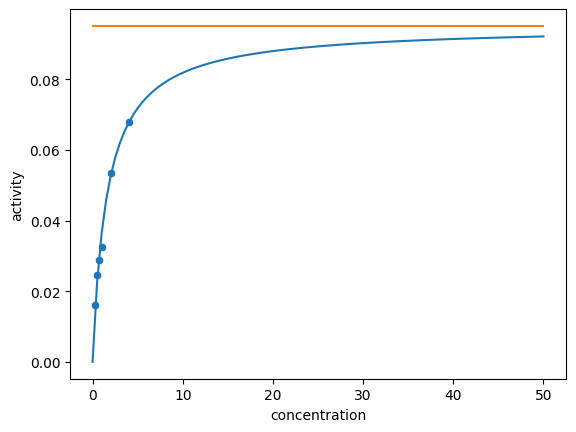

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

RES = 100

#ミカエリスメンテン式の表現
#k1はVmax、k2はKmに対応
def MM_Eq(x,k1,k2):
    return  k1*x/(x+k2)

#回帰分析により得たVmax、Kmをミカエリスメンテン式に代入してプロット
def graph_plot(max, k1, k2):
  limit = 50
  x = []
  y = []
  lst = range(0,RES + 1)
  for j in lst:
    i = limit/RES * j
    x.append(i)
    y.append(MM_Eq(i,k1,k2))
  return x, y

# F4分画について、SとVを別の配列に入力
data = [0.25, 0.5, 0.75, 1, 2, 4]
target = [0.01617, 0.024675, 0.02898, 0.032655, 0.05355, 0.06804]

#SとVを入力された順番で組としてDataFrameを作成する
data_1 = pd.DataFrame({'concentration': data, 'activity': target,})

#非線形回帰分析を行い、得られたVmax,Kmを変数paramに代入する。
param, _ = curve_fit(MM_Eq,data_1["concentration"],data_1["activity"])
print("Vmax, Km=",param)

#入力データの描画
sns.scatterplot(data = data_1, x = "concentration", y = "activity")
#fittingした関数の描画
xs, ys = graph_plot(data_1["concentration"].max(),param[0],param[1])
curve = pd.DataFrame({'concentration': xs, 'activity': ys,})
sns.lineplot(data = curve, x = "concentration", y = "activity")
#y=Vmaxの描画
vmax = pd.DataFrame({'concentration': [0,50], 'activity': [param[0],param[0]],})
sns.lineplot(data = vmax, x = "concentration", y = "activity")

a,b= [12.20377059 15.00332718]
Vmax,Km= [0.066651882487484, 0.8134042835313426]


<Axes: xlabel='1/concentration', ylabel='1/activity'>

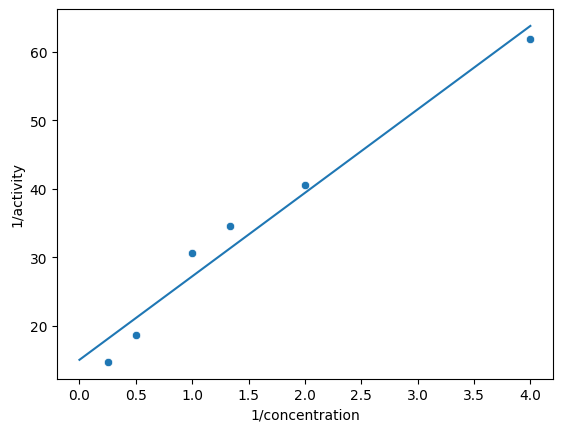

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

RES = 100

def MM_Eq(x,k1,k2):
    return  k1*x+k2

def graph_plot(max, k1, k2):
  limit = max + max/10
  x = []
  y = []
  lst = range(0,RES + 1)
  for j in lst:
    i = max/RES * j
    x.append(i)
    y.append(MM_Eq(i,k1,k2))
  return x, y

# ランダムな点と定義した関数からtargetを生成
data = [0.25, 0.5, 1, 1.3333333333, 2, 4]
target = [14.6972369194591, 18.6741363211951, 30.6231817485837, 34.5065562456867, 40.5268490374873, 61.8429189857761]

data_1 = pd.DataFrame({'1/concentration': data, '1/activity': target,})

param, _ = curve_fit(MM_Eq,data_1["1/concentration"],data_1["1/activity"])
print("a,b=",param)
print("Vmax,Km=",[1/param[1], param[0]/param[1]])

xs, ys = graph_plot(data_1["1/concentration"].max(),param[0],param[1])
curve = pd.DataFrame({'1/concentration': xs, '1/activity': ys,})

#入力データの描画
sns.scatterplot(data = data_1, x = "1/concentration", y = "1/activity")
#fittingした関数の描画
sns.lineplot(data = curve, x = "1/concentration", y = "1/activity")